In [1]:
#for data handling 
import pandas as pd
import numpy as np


In [2]:
#for data plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#for model training 
from xgboost import XGBClassifier


In [4]:
#for data evaluation
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix


In [5]:
df1 = pd.read_csv("/home/subhan/All/Car_Project/FindACar/ML_model_training/csv_files/Honda_cars.csv")
df2 = pd.read_csv("/home/subhan/All/Car_Project/FindACar/ML_model_training/csv_files/Suzuki_cars.csv")
#load data in pandas 

In [6]:
#concatenate both 
df=pd.concat([df1,df2],ignore_index=True)

In [7]:
df.head(5)


,primary_key,normal,crack,dent,glass_shatter,lamp_broken,scratch,tire_flat,total_images,description_rating,rating,condition
0,1,6,0,0,0,0,0,0,6,2,NaN,6
1,2,10,0,0,0,0,0,0,10,4,NaN,6
2,3,6,0,0,0,0,0,0,6,2,NaN,6
3,4,4,0,0,0,0,0,0,4,2,NaN,6
4,5,8,0,0,0,0,0,0,8,4,7.0,7


In [8]:
df.shape

(1973, 12)

In [9]:
df=df.drop(columns=["primary_key"])

In [10]:
df.head()

,normal,crack,dent,glass_shatter,lamp_broken,scratch,tire_flat,total_images,description_rating,rating,condition
0,6,0,0,0,0,0,0,6,2,NaN,6
1,10,0,0,0,0,0,0,10,4,NaN,6
2,6,0,0,0,0,0,0,6,2,NaN,6
3,4,0,0,0,0,0,0,4,2,NaN,6
4,8,0,0,0,0,0,0,8,4,7.0,7


In [54]:
inputs = df.drop(columns=["condition","total_images","condition_name"])   # inputs/features
prediction = df["condition"]                 # target/labels

In [55]:
print (prediction)

0       6
1       6
2       6
3       6
4       7
       ..
1968    5
1969    5
1970    6
1971    5
1972    6
Name: condition, Length: 1973, dtype: int64


In [56]:
print (inputs)

      normal  crack  dent  glass_shatter  lamp_broken  scratch  tire_flat  \
0          6      0     0              0            0        0          0   
1         10      0     0              0            0        0          0   
2          6      0     0              0            0        0          0   
3          4      0     0              0            0        0          0   
4          8      0     0              0            0        0          0   
...      ...    ...   ...            ...          ...      ...        ...   
1968       2      0     2              0            0        0          0   
1969       2      0     2              0            0        0          0   
1970       4      0     0              0            0        0          0   
1971       3      0     0              0            0        0          0   
1972       4      0     0              0            0        0          0   

      description_rating  rating  
0                      2     NaN  
1    

In [12]:
label_map = {
    7: "A+",
    6: "A",
    5: "B+",
    4: "B",
    3: "C+",
    2: "C",
    1: "D"
}
df["condition_name"] = df["condition"].map(label_map)

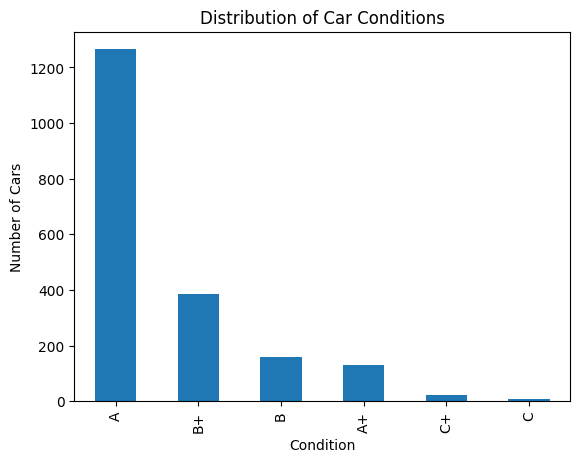

In [13]:

df["condition_name"].value_counts().plot(kind="bar")
plt.title("Distribution of Car Conditions")
plt.xlabel("Condition")
plt.ylabel("Number of Cars")
plt.show()


In [14]:
df.head(20)

,normal,crack,dent,glass_shatter,lamp_broken,scratch,tire_flat,total_images,description_rating,rating,condition,condition_name
0,6,0,0,0,0,0,0,6,2,NaN,6,A
1,10,0,0,0,0,0,0,10,4,NaN,6,A
2,6,0,0,0,0,0,0,6,2,NaN,6,A
3,4,0,0,0,0,0,0,4,2,NaN,6,A
4,8,0,0,0,0,0,0,8,4,7.0,7,A+
5,2,0,2,0,0,0,0,4,4,NaN,4,B
6,8,0,0,0,0,0,0,8,4,NaN,6,A
7,6,0,0,0,0,0,0,6,4,NaN,6,A
8,11,0,0,0,0,0,0,0,5,9.0,7,A+
9,9,0,1,0,0,0,0,10,4,NaN,5,B+


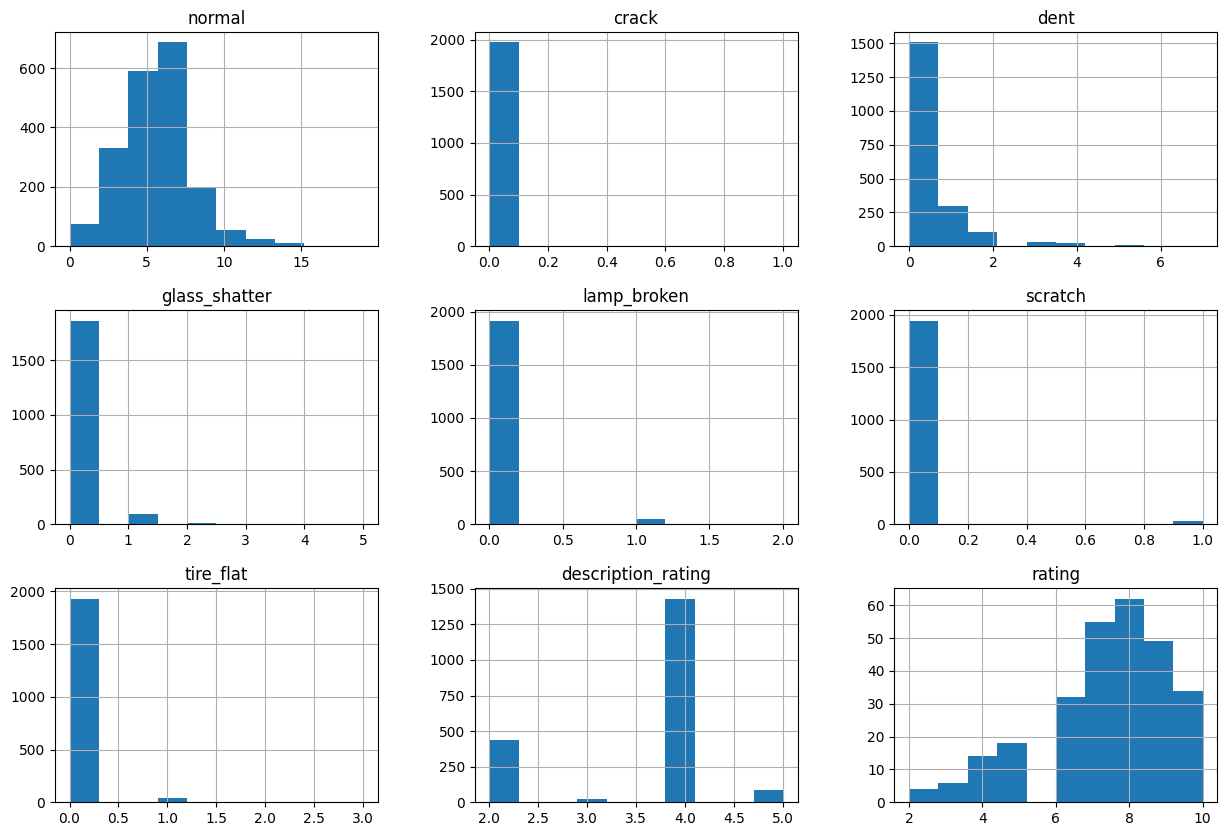

In [108]:
inputs.hist(figsize=(15,10))
plt.show()

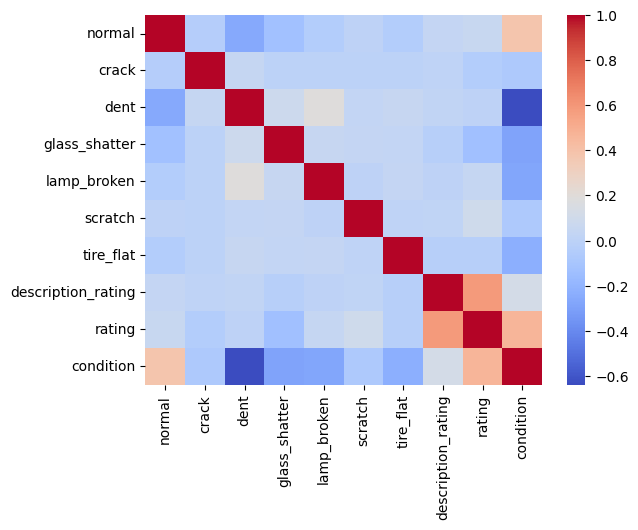

In [18]:
plot_df=df.drop(columns=["condition_name","total_images"])
corr = plot_df.corr(numeric_only=True)

sns.heatmap(corr, annot=False, cmap="coolwarm")
plt.show()

In [19]:
df[df["condition"] <= 2].describe()


,normal,crack,dent,glass_shatter,lamp_broken,scratch,tire_flat,total_images,description_rating,rating,condition
count,9.000000,9.0,9.000000,9.000000,9.000000,9.0,9.000000,9.000000,9.000000,0.0,9.0
mean,2.444444,0.0,3.555556,0.333333,0.888889,0.0,0.444444,7.666667,3.777778,NaN,2.0
std,2.006932,0.0,1.666667,0.500000,0.600925,0.0,1.013794,2.645751,0.666667,NaN,0.0
min,1.000000,0.0,1.000000,0.000000,0.000000,0.0,0.000000,5.000000,2.000000,NaN,2.0
25%,1.000000,0.0,3.000000,0.000000,1.000000,0.0,0.000000,6.000000,4.000000,NaN,2.0
50%,2.000000,0.0,4.000000,0.000000,1.000000,0.0,0.000000,7.000000,4.000000,NaN,2.0
75%,3.000000,0.0,4.000000,1.000000,1.000000,0.0,0.000000,10.000000,4.000000,NaN,2.0
max,7.000000,0.0,7.000000,1.000000,2.000000,0.0,3.000000,12.000000,4.000000,NaN,2.0


In [48]:
import os

In [49]:
import joblib

In [80]:
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Encode labels
le = LabelEncoder()
prediction = le.fit_transform(df["condition"])

joblib.dump(le, "/home/subhan/All/Car_Project/FindACar/ML_model_training/notebooks/label_encoder.pkl")

# Train test split
X_train, X_test, y_train, y_test = train_test_split(
    inputs, prediction,
    test_size=0.2,
    random_state=42,
    stratify=prediction
)

# Compute class weights using ONLY y_train
classes = np.unique(y_train)
weights = compute_class_weight(class_weight="balanced", classes=classes, y=y_train)
class_weights = dict(zip(classes, weights))

# Create sample weights for training only
sample_weights = np.array([class_weights[y] for y in y_train])

# Train model
model = XGBClassifier(
    n_estimators=200,
    max_depth=10,
    learning_rate=0.05,
    random_state=42,
    eval_metric="mlogloss"
)

model.fit(
    X_train,
    y_train,
    sample_weight=sample_weights,
    eval_set=[(X_test, y_test)],
    verbose=True
)


[0]	validation_0-mlogloss:1.68691
[1]	validation_0-mlogloss:1.59490
[2]	validation_0-mlogloss:1.51343
[3]	validation_0-mlogloss:1.44050
[4]	validation_0-mlogloss:1.37499
[5]	validation_0-mlogloss:1.31532


[6]	validation_0-mlogloss:1.26074
[7]	validation_0-mlogloss:1.21074
[8]	validation_0-mlogloss:1.16485
[9]	validation_0-mlogloss:1.12207
[10]	validation_0-mlogloss:1.08255
[11]	validation_0-mlogloss:1.04558
[12]	validation_0-mlogloss:1.01152
[13]	validation_0-mlogloss:0.97921
[14]	validation_0-mlogloss:0.94927
[15]	validation_0-mlogloss:0.92085
[16]	validation_0-mlogloss:0.89453
[17]	validation_0-mlogloss:0.86908
[18]	validation_0-mlogloss:0.84560
[19]	validation_0-mlogloss:0.82356
[20]	validation_0-mlogloss:0.80289
[21]	validation_0-mlogloss:0.78346
[22]	validation_0-mlogloss:0.76530
[23]	validation_0-mlogloss:0.74778
[24]	validation_0-mlogloss:0.73182
[25]	validation_0-mlogloss:0.71633
[26]	validation_0-mlogloss:0.70194
[27]	validation_0-mlogloss:0.68850
[28]	validation_0-mlogloss:0.67568
[29]	validation_0-mlogloss:0.66356
[30]	validation_0-mlogloss:0.65209
[31]	validation_0-mlogloss:0.64104
[32]	validation_0-mlogloss:0.63062
[33]	validation_0-mlogloss:0.62057
[34]	validation_0-mloglo

,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'mlogloss'


In [82]:
# Predictions (encoded)
y_test_pred_encoded = model.predict(X_test)

# Decode both true labels and predictions
y_test_original = le.inverse_transform(y_test)
y_test_pred_original = le.inverse_transform(y_test_pred_encoded)

# Now compare original vs original
from sklearn.metrics import accuracy_score
print("Decoded accuracy of the testing:", accuracy_score(y_test_original, y_test_pred_original)*100)


Decoded accuracy of the testing: 80.50632911392405


In [83]:
# Predictions (encoded)
y_train_pred_encoded = model.predict(X_train)

# Decode both true labels and predictions
y_train_original = le.inverse_transform(y_train)
y_train_pred_original = le.inverse_transform(y_train_pred_encoded)

# Now compare original vs original
from sklearn.metrics import accuracy_score
print("Decoded accuracy of the training:", accuracy_score(y_train_original, y_train_pred_original)*100)


Decoded accuracy of the training: 83.65019011406845


In [84]:
y_test_pred = model.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))


              precision    recall  f1-score   support

           0       0.33      0.50      0.40         2
           1       0.00      0.00      0.00         5
           2       0.52      0.81      0.63        32
           3       0.61      0.78      0.69        77
           4       0.98      0.81      0.89       253
           5       0.81      0.96      0.88        26

    accuracy                           0.81       395
   macro avg       0.54      0.64      0.58       395
weighted avg       0.84      0.81      0.81       395

[[  1   1   0   0   0   0]
 [  0   0   2   3   0   0]
 [  0   1  26   5   0   0]
 [  0   0  13  60   4   0]
 [  2   0   9  30 206   6]
 [  0   0   0   0   1  25]]


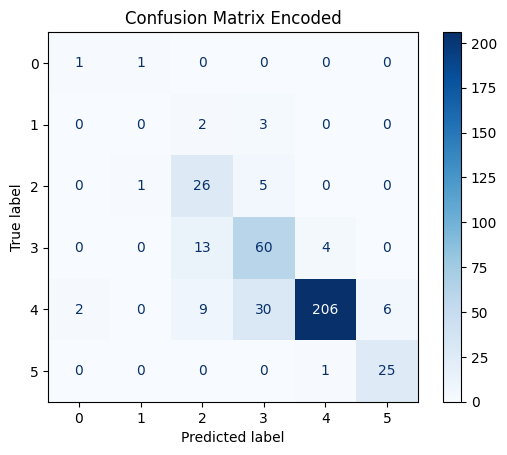

In [90]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_test_pred))
disp.plot(cmap="Blues", values_format="d")

plt.title("Confusion Matrix Encoded")
plt.show()


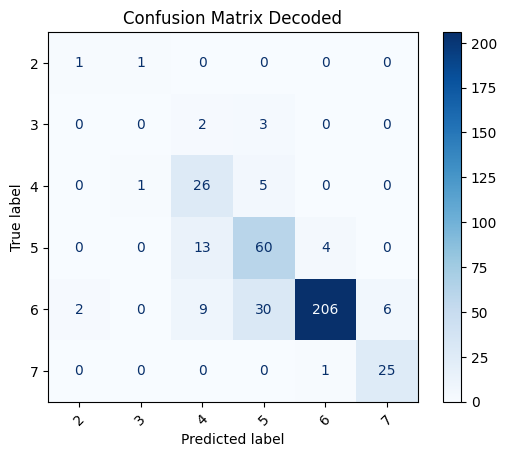

In [91]:
class_names = le.inverse_transform(sorted(np.unique(y_test)))

disp = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(y_test, y_test_pred),
    display_labels=class_names
)

disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix Decoded")
plt.xticks(rotation=45)
plt.show()


In [92]:

joblib.dump(model, "/home/subhan/All/Car_Project/FindACar/ML_model_training/notebooks/model_trained_result.pkl")

print("Model saved successfully!")


Model saved successfully!
